In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import data,io, color, measure
from skimage.filters import unsharp_mask

In [238]:
filename = "microstructure04.jpg"

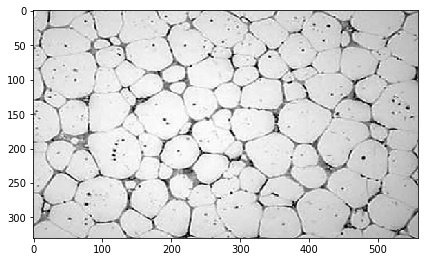

In [240]:
image = io.imread(fname=filename,as_gray=True)
image=image[0:330,:]
io.imshow(image)

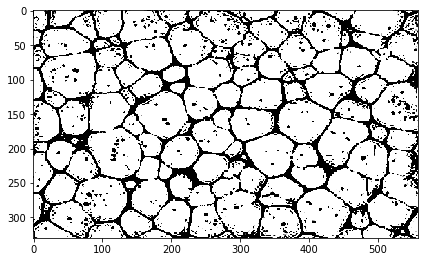

In [287]:
sharp=unsharp_mask(image,36,200)
io.imshow(sharp)

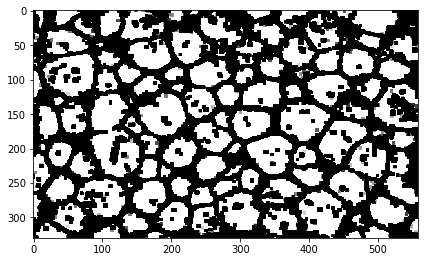

In [293]:
kernel=np.ones((3,3),np.float64)
erode=cv2.erode(sharp,kernel,iterations=2)
io.imshow(erode)

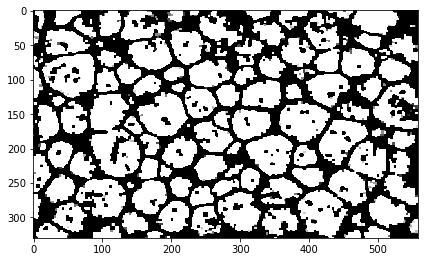

In [296]:
dilate=cv2.dilate(erode,kernel,iterations=1)
io.imshow(dilate)

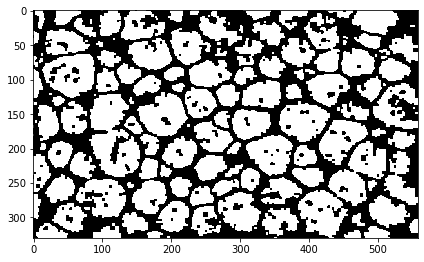

In [298]:
t=0.5
mask=dilate>t
io.imshow(mask)

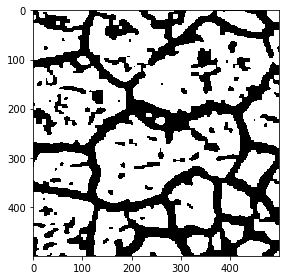

In [208]:
io.imshow(mask[0:500,0:500])

In [299]:
s=[[1,1,1],[1,1,1],[1,1,1]]
#s=[[1,0,1],[0,1,0],[1,0,1]]
labelled_mask,num_labels=ndimage.label(mask,structure=s)

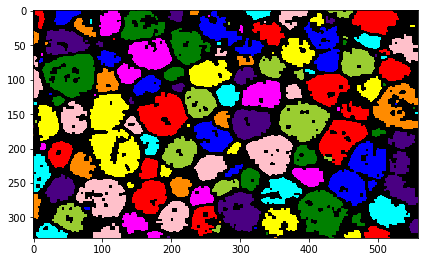

In [300]:
img2=color.label2rgb(labelled_mask,bg_label=0)
io.imshow(img2)

In [301]:
clusters=measure.regionprops(labelled_mask,image)
len(clusters)

147

In [302]:
for prop in clusters:
    print(prop.perimeter,",",prop.equivalent_diameter)

74.97056274847715 , 17.371176474327626
105.45584412271572 , 26.462837142006137
6.0 , 2.763953195770684
140.52691193458116 , 34.668979365276876
327.9238815542512 , 45.21971593060566
72.72792206135786 , 19.60913925979463
35.65685424949238 , 10.403141895720198
94.59188309203678 , 21.587164551489145
171.25483399593904 , 27.937355653723827
103.42031021678298 , 18.643883600599406
195.01219330881975 , 47.49926813405348
256.12489168102786 , 42.17482239435066
68.72792206135786 , 16.545286401814263
8.0 , 3.385137501286538
12.828427124746192 , 4.51351666838205
45.89949493661166 , 10.341765891652821
112.76955262170048 , 22.820056393372074
16.82842712474619 , 5.170882945826411
8.0 , 3.385137501286538
14.0 , 5.046265044040321
166.66904755831212 , 35.01613458935697
387.27922061357856 , 50.37426339567835
19.414213562373096 , 5.863230142835039
29.071067811865476 , 8.136857890256438
294.16652224137044 , 48.283554202337704
279.53910524340097 , 44.83798881681494
50.72792206135786 , 12.6156626101008
110.18

In [303]:
kl=[]
bl=[]
for prop in clusters:
    kl.append(prop.equivalent_diameter)
bl.append([i for i in kl if i>20])

In [305]:
mean=np.mean(bl)
print(mean)
print(mean*0.5)

38.787645872288294
19.393822936144147
